<a href="https://colab.research.google.com/github/sasireddyvari/Complete_Machine_Learning/blob/master/DataScience_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1 : LifeCycle of a Data Science Project:**

   It is an Iterative process and gets retrained where the model needs to become robust by understanding the various patterns. The Phases are 
- Business Problem Statement
- Data Gathering
- Exploratory Data Analysis
- Feature Engineering
- Data Preparation to fit the model
- Model Building
- Model Deployment

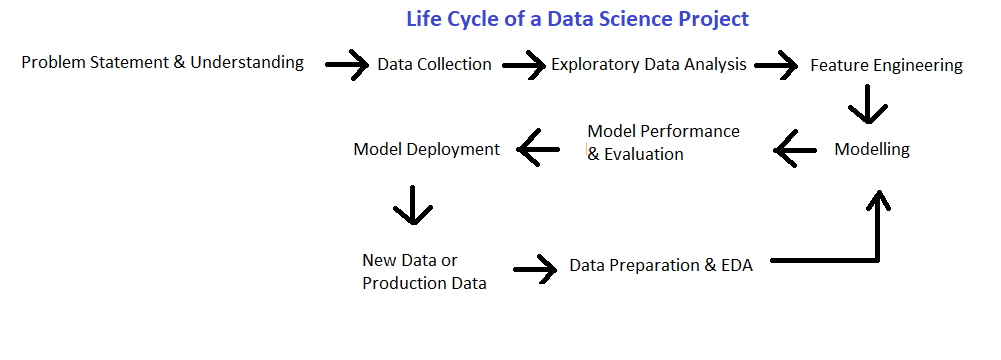

**Problem 2 : Generate a pdf report, where name of pdf report is today’s date which you need to take from system and make below shown chart on one pager pdf.**

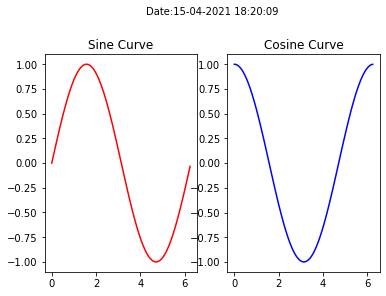

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,np.pi *2,0.05)

y1 = np.sin(x)
y2 = np.cos(x)

pp = PdfPages('generated_sin_cos.pdf')

def function_plot():
  figure, axis = plt.subplots(1, 2)
  # Date and Time is taken based on System as now it takes the time of the Colab Compute Engine
  dt = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
  x_position = -4
  y_position = 1.5
  plt.text(x_position, y_position, "Date:"+dt)
  # Sine
  axis[0].set_title("Sine Curve")
  axis[0].plot(x, y1,'r-')

  # Cosine
  axis[1].set_title("Cosine Curve")
  axis[1].plot(x, y2,'b-')
  pp.savefig(bbox_inches="tight")
  pp.close()
function_plot()

**Problem 3 : EDA on given dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sasi_reddyvari/assignments/Mahindra_Teqo/genres_v2.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


danceability  energy  ...  Unnamed: 0  title
0         0.831   0.814  ...         NaN    NaN
1         0.719   0.493  ...         NaN    NaN
2         0.850   0.893  ...         NaN    NaN
3         0.476   0.781  ...         NaN    NaN
4         0.798   0.624  ...         NaN    NaN

[5 rows x 22 columns]

In [ ]:
df.tail()

danceability  energy  ...  Unnamed: 0                        title
42300         0.528   0.693  ...     20995.0           Euphoric Hardstyle
42301         0.517   0.768  ...     20996.0  Greatest Hardstyle Playlist
42302         0.361   0.821  ...     20997.0       Best of Hardstyle 2020
42303         0.477   0.921  ...     20998.0           Euphoric Hardstyle
42304         0.529   0.945  ...     20999.0       Best of Hardstyle 2020

[5 rows x 22 columns]

In [ ]:
df.describe()

danceability        energy  ...  time_signature    Unnamed: 0
count  42305.000000  42305.000000  ...    42305.000000  20780.000000
mean       0.639364      0.762516  ...        3.972580  10483.970645
std        0.156617      0.183823  ...        0.268342   6052.359519
min        0.065100      0.000243  ...        1.000000      0.000000
25%        0.524000      0.632000  ...        4.000000   5255.750000
50%        0.646000      0.803000  ...        4.000000  10479.500000
75%        0.766000      0.923000  ...        4.000000  15709.250000
max        0.988000      1.000000  ...        5.000000  20999.000000

[8 rows x 14 columns]

In [ ]:
df.shape

(42305, 22)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.shape

(42305, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'title'],
      dtype='object')

In [ ]:
# Categorical Columns
categorical_features=[feature for feature in df.columns if df.dtypes[feature]=='object']
categorical_features

['type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'genre',
 'song_name',
 'title']

In [ ]:
# Numerical Columns
numerical_features=[feature for feature in df.columns if df.dtypes[feature]!='object']
numerical_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [ ]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
title               21525
dtype: int64

In [ ]:
# filling null values
df=df.fillna({'song_name':'missing','title':'missing'})
df.fillna({'song_name':'missing','title':'missing'})

danceability  ...                        title
0             0.831  ...                      missing
1             0.719  ...                      missing
2             0.850  ...                      missing
3             0.476  ...                      missing
4             0.798  ...                      missing
...             ...  ...                          ...
42300         0.528  ...           Euphoric Hardstyle
42301         0.517  ...  Greatest Hardstyle Playlist
42302         0.361  ...       Best of Hardstyle 2020
42303         0.477  ...           Euphoric Hardstyle
42304         0.529  ...       Best of Hardstyle 2020

[42305 rows x 21 columns]

In [ ]:
df.count()

danceability        42305
energy              42305
key                 42305
loudness            42305
mode                42305
speechiness         42305
acousticness        42305
instrumentalness    42305
liveness            42305
valence             42305
tempo               42305
type                42305
id                  42305
uri                 42305
track_href          42305
analysis_url        42305
duration_ms         42305
time_signature      42305
genre               42305
song_name           42305
title               42305
dtype: int64

In [ ]:
duplicate_rows = df[df.duplicated()]
print("No: of duplicate rows: ", duplicate_rows.shape)

No: of duplicate rows:  (0, 21)


In [ ]:
for i in categorical_features:
  print(df[i].value_counts())
  print("---------------------------------------------------------------------------------------------")
  print("---------------------------------------------------------------------------------------------")

audio_features    42305
Name: type, dtype: int64
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
7D5qMGajdfznFcXFArk5VE    9
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
5cRDn5aGMLvWsldoRmOOz0    8
2KVv2zAjDHxymySY5EIaAz    7
                         ..
11FPESVvLOXYiAmYtmLdTR    1
4rw6Sla1yxud0nPNjdm9tf    1
2EgB4n6XyBsuNUbuarr4eG    1
4y4KG66qCAN2TTevOAEjHy    1
1ktWIGS7eMLzZqrVjSbPkW    1
Name: id, Length: 35877, dtype: int64
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
spotify:track:7D5qMGajdfznFcXFArk5VE    9
spotify:track:5lXY6PTuWXOludKy4zDQwM    8
spotify:track:5cRDn5aGMLvWsldoRmOOz0    8
spotify:track:3BSuC9Y6MhalaLlhyNbTYZ    8
spotify:track:2KVv2zAjDHxymySY5EIaAz    7
                   

In [ ]:
# correlation map
s=df.corr()
df.corr()

danceability    energy  ...  duration_ms  time_signature
danceability          1.000000 -0.323248  ...    -0.049807        0.057711
energy               -0.323248  1.000000  ...     0.294464        0.039781
key                  -0.012708  0.044731  ...     0.069255        0.008061
loudness             -0.216776  0.601540  ...    -0.095999        0.047471
mode                  0.084413 -0.032203  ...    -0.031253       -0.009317
speechiness           0.182177 -0.148363  ...    -0.309892        0.021637
acousticness          0.069910 -0.497334  ...    -0.246681       -0.049791
instrumentalness     -0.067114  0.303875  ...     0.603784       -0.010164
liveness             -0.196702  0.231754  ...     0.010594        0.003077
valence               0.369845 -0.013520  ...    -0.191093        0.040308
tempo                -0.165929 -0.024504  ...    -0.156961       -0.019778
duration_ms          -0.049807  0.294464  ...     1.000000        0.003040
time_signature        0.057711  0.039781  ...     0.003040        1.000000

[13 rows x 13 columns]

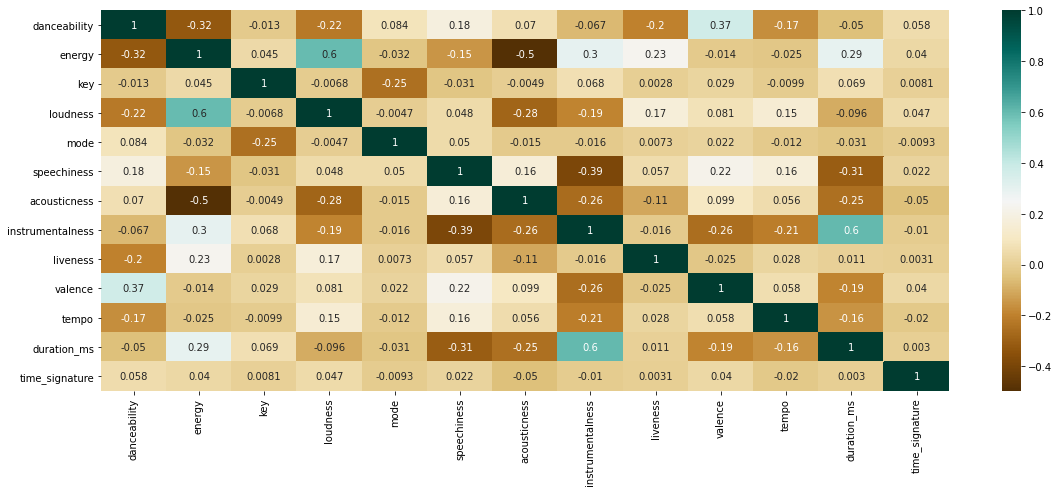

In [ ]:
import seaborn as sns
plt.figure(figsize=(19,7))
sns.heatmap(s,cmap="BrBG",annot=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

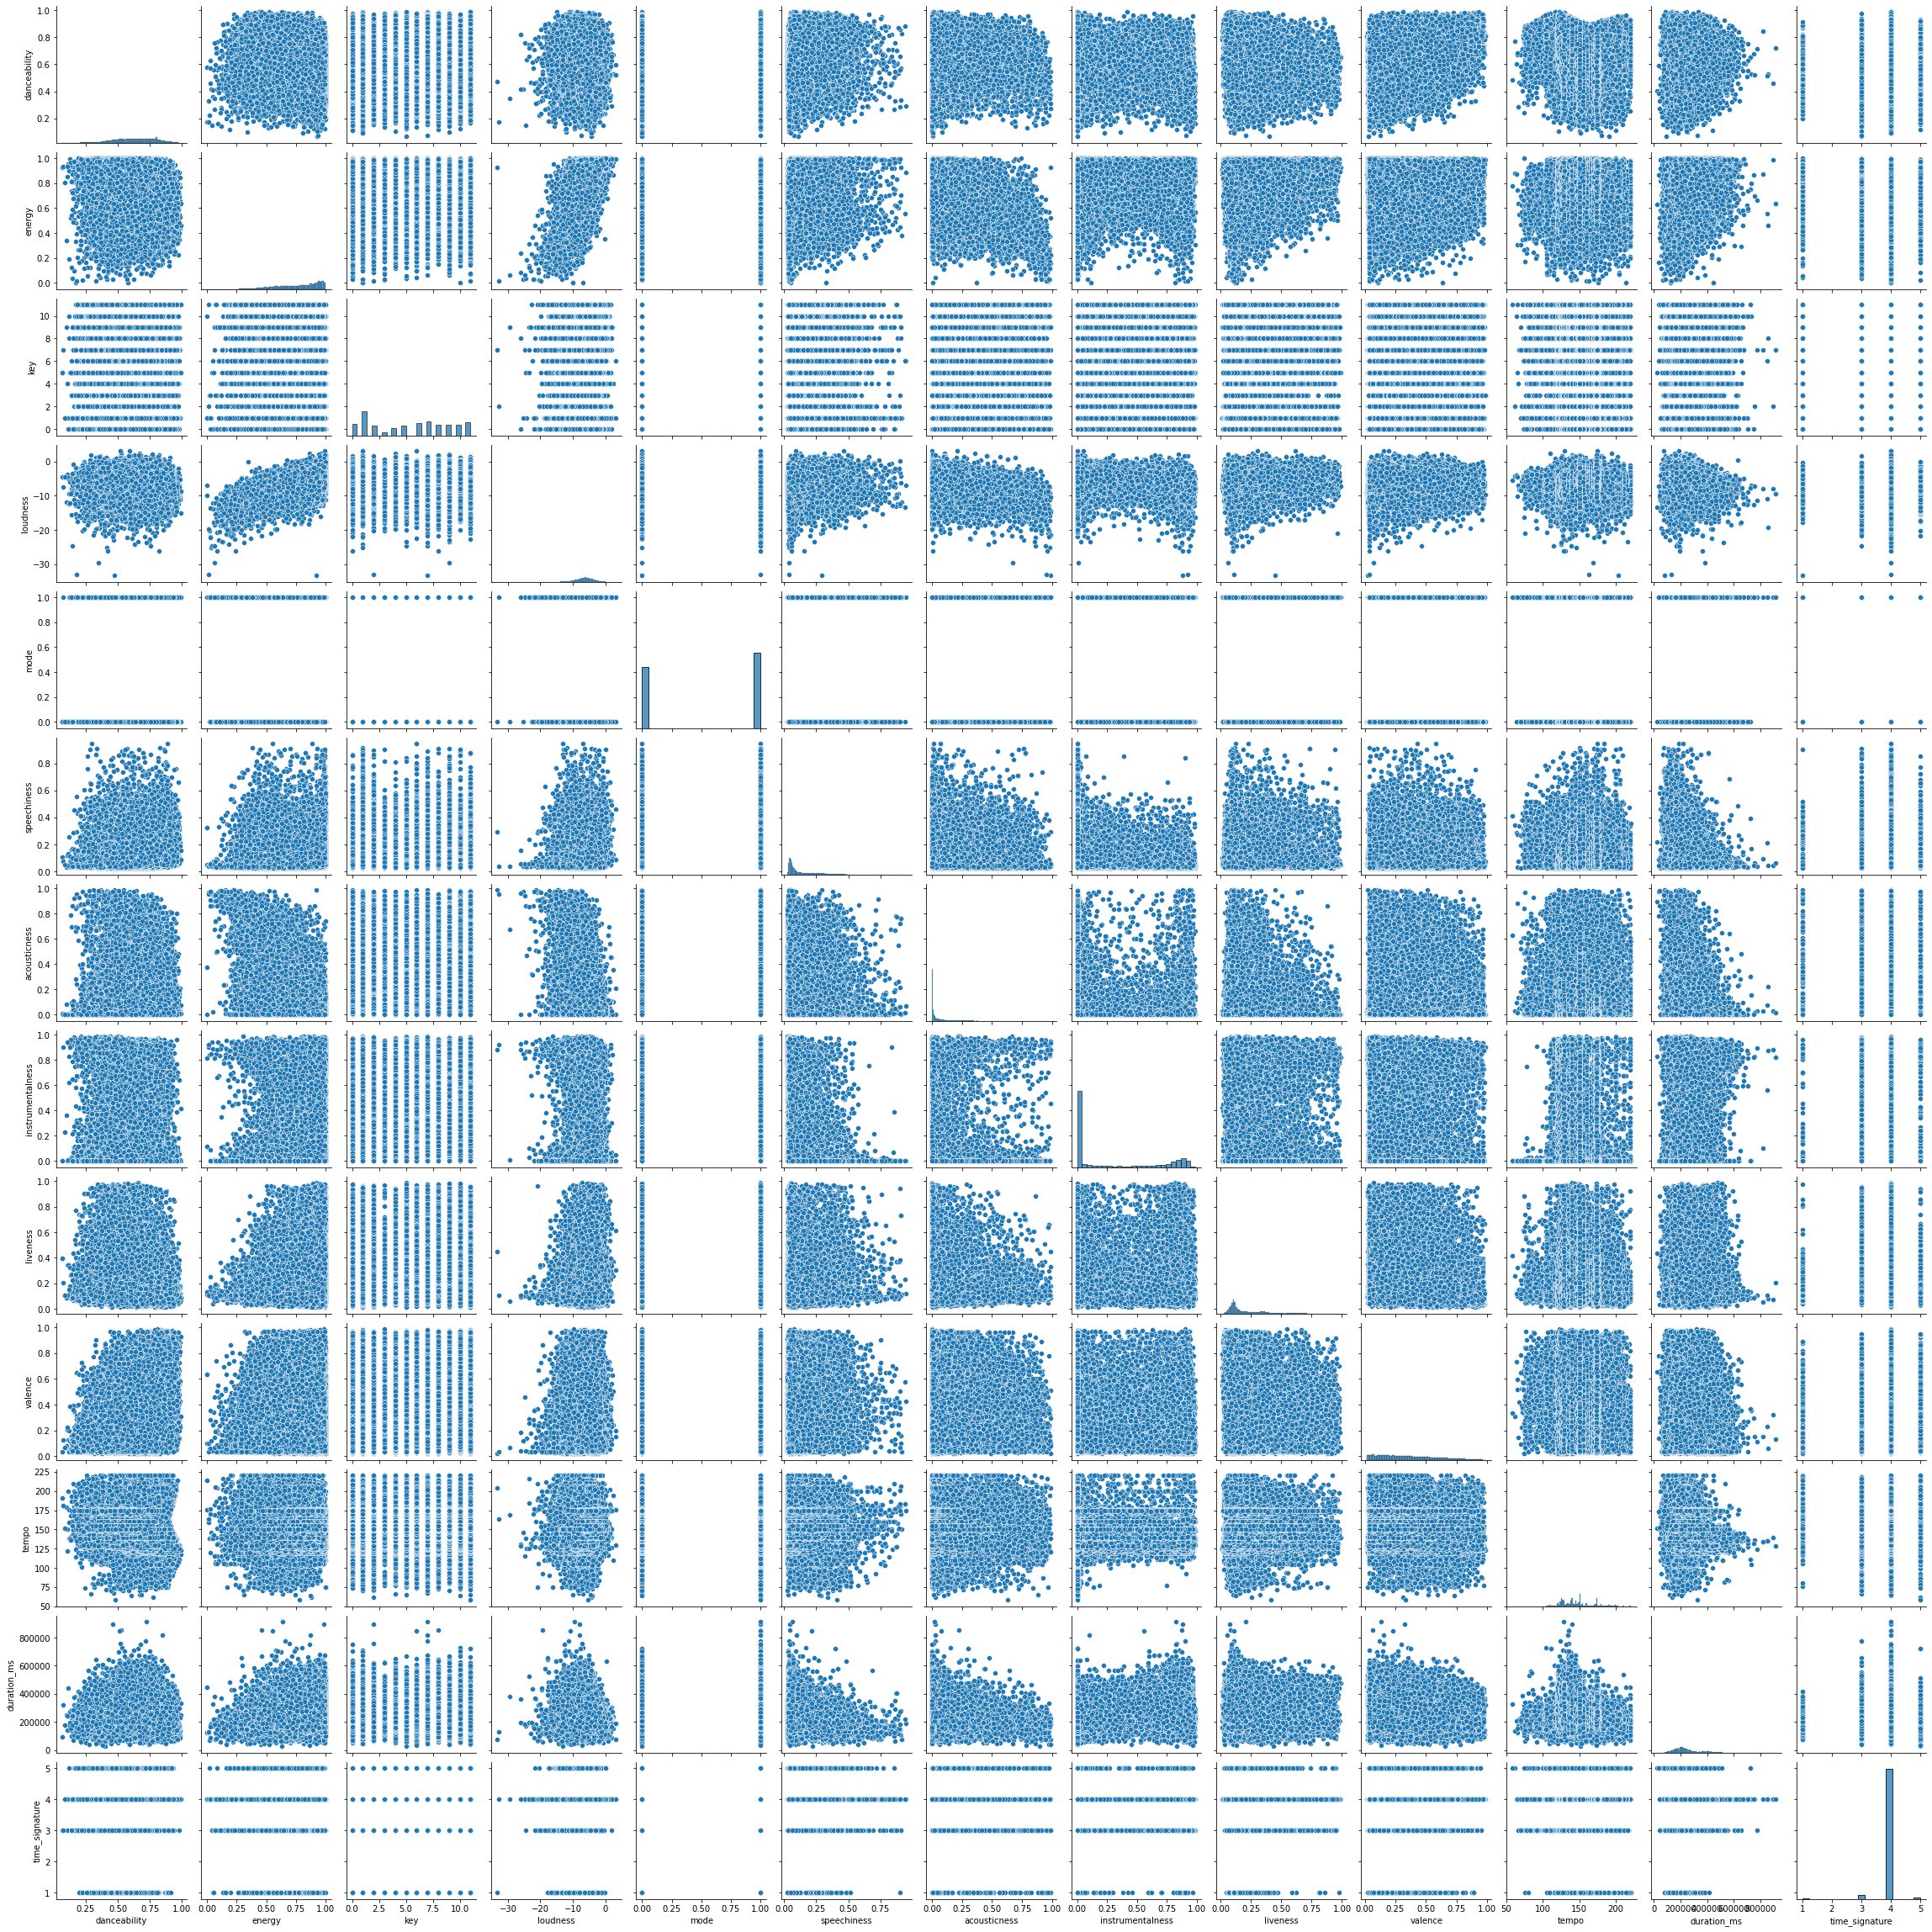

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


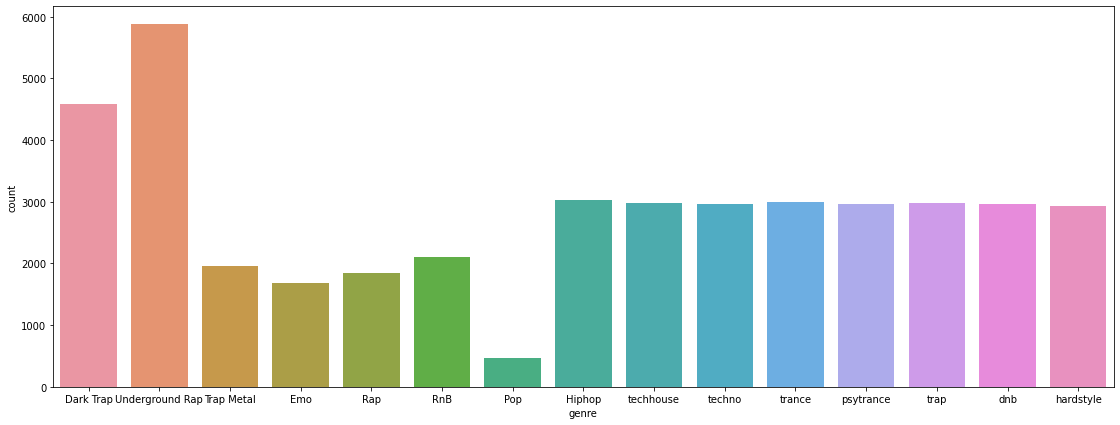

In [ ]:
'''
['type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'genre',
 'song_name',
 'title']

 '''
plt.figure(figsize=(19,7))
sns.countplot(df['genre'])

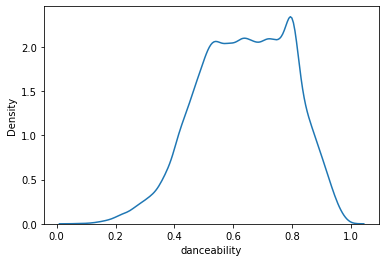

In [ ]:
# for all numerical features
# for i in numerical_features:
#   sns.kdeplot(df[i])
#   print('-----')
sns.kdeplot(df['danceability'])

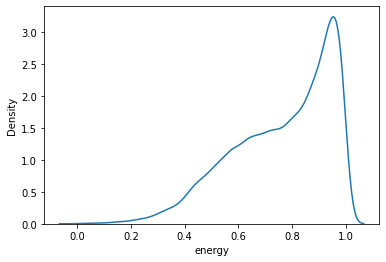

In [ ]:
sns.kdeplot(df['energy'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


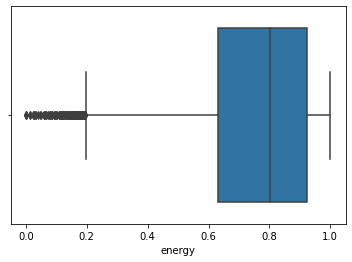

In [ ]:
# Detecting Outliers using boxplot
sns.boxplot(df['energy']) # can be found which skewed it is
# z-score=x-mu/sigma or scatter plot or interquartile range also can be used

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


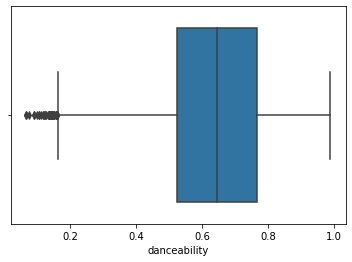

In [ ]:
sns.boxplot(df['danceability'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


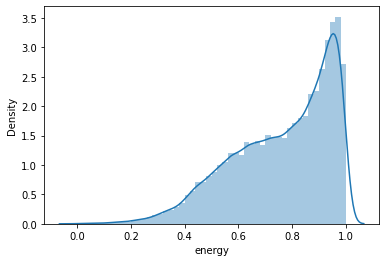

In [ ]:
sns.distplot(df['energy'])